 *Artificial Intelligence for Vision & NLP* &nbsp; | &nbsp;  *ATU Donegal - MSc/PGDip in Big Data Analytics & Artificial Intelligence*
 
# Text Feature Extraction using TF-IDF

In this notebook we'll explore using Sklearn for Term Frequency-Inverse Document Frequency in a dataset containing spam and non-spam messages. We'll create a train and test set, then build a neural network model and use TF-IDF methods to improve the model accuracy.



## Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import io

In [6]:
# Read tsv file into a dataframe object
# Press tab to check you are in the correct folder location and to browse
# to the tsv file
# The sep command indicates this files is separated by tabs
from google.colab import files
uploaded = files.upload()
#dataframe = pd.read_csv(io.BytesIO(uploaded['SMSSpamCollection.tsv']), sep="\t")
dataframe = pd.read_csv('SMSSpamCollection.tsv', sep="\t")

Saving SMSSpamCollection.tsv to SMSSpamCollection.tsv


In [7]:
dataframe.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
# Check for missing values
dataframe.isnull().sum()

label      0
message    0
dtype: int64

Lets see how many spam and ham (non-spam) we have in the dataframe.

In [9]:
dataframe["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

We can see that there are 5572 messages, and 4824 are labelled as ham. 

Therefore 4824 / 5572 = 86% of messages are ham. If we were to randomly choose either *ham* or *spam* when viewing a text message, then 86% would randomly be correct with this dataset. So our text classifier needs to perform better than 86% to beat a random selection.

First we split the data into text message data `X` and *label data* `y`. Make sure you pay attention to capitalisation convention rules for both datasets. A multidimensional input is typically represented with a capital `X`.

In [10]:
# Following convention, X contains message data (large matrix)
# and y contains label data
X = dataframe["message"]
y = dataframe["label"]

In [11]:
# Contains index and message text
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [12]:
# Contains index and message label
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

## Train-Test Split

Next we split the data into train and test splits:

In [13]:
from sklearn.model_selection import train_test_split

# test size represents the proportion of training and testing data split. 
# Random_state sets "randomness" of data randomisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

## Scikit-learn's CountVectorizer

The count vectorizer builds a dictionary of features and transforms documents to feature vectors.

Text preprocessing, tokenising and the ability to filter out stopwords are all included in the count vectorizer in Scikit-learn. See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for more details.

For spam detection, stop word removal is appropriate, since words like *and*, *the**, *him*, are uninformative in representing the content of a text. We remove them to avoid them being construed as signal for prediction. See the relevant section of the documentation [here](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) for more information.

In [14]:
# Import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# Create an instance of count vectorizer
count_vectorizer = CountVectorizer()

Next we need to pass the `X_train` data into `count_vectorizer` and then transform the message data. Remember that `X_train` contains training message text data.

There are 2 ways to do this. We can call the `.fit()` method first, which creates the vocabulary and the word count, followed by the `.transform()` method which transforms the data into the vectorised representation:

In [16]:
# Fit count vectorizer to message data
# This step builds vocabulary and counts number of words in text
count_vectorizer.fit(X_train)

# Transform original text message to a vector
X_train_count = count_vectorizer.transform(X_train)

There's an easier way to do this, by using `.fit_transform()` in the `CountVectorizer` class. This method performs the `fit` and the `transform` processes within one command.

In [17]:
# Alternative is to use the fit_transform function
# which performs the fit and then transforms X_train
# into a numerical vector and stores in X_train_counts
# No need to do this in 2 separate functions (above)
X_train_counts = count_vectorizer.fit_transform(X_train)

The output of the fit transform is a *compressed sparse matrix*. A sparse matrix is one in which most of the elements are zero. Large sparse matrices can be stored very efficiently by only storing the non-zero entries, since we know all of the other entries are zero. See the Wikipedia entry for [Sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix) for more information.

Lets examine the dimensions of the sparse matrix. It contains 3900 rows of message data. Remember that previously we decided to split the message data into a 70/30 for training and testing. 70% of the original message texts (5572) = 3900. 

The sparse matrix contains 7155 columns or features. These features represent the number of unique words in all of the text messages.

In [18]:
# The matrix contains 3900 rows of text. These aare 70% of the original
# text messages (5572 rows)
X_train_counts

<3900x7155 sparse matrix of type '<class 'numpy.int64'>'
	with 51338 stored elements in Compressed Sparse Row format>

In [19]:
# Same as size of no of rows in X_train
X_train.shape

(3900,)

## Transform Count Vectorization to Frequencies with TF-IDF
While counting words is helpful, longer documents will have higher average count values than shorter documents, even though they might have the same tpoic content within them. To avoid this we can simply divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called *term frequency* or *tf*.

Another refinement on top of *tf* is to downscale weights for words that occur in many documents in the corpus, and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called *Term Frequency-Inverse Document Frequency* or *TF–IDF*. Both can be computed using Scikit-learn's [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html):

In [20]:
# Load the tfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

# Create an instance of TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Perform a tf-idf fit transform on the X_train_counts
# sparse matrix. Put the result into X_train_tfidf
X_train_transform = tfidf_transformer.fit_transform(X_train_counts)

# Shape is the same as original count vectorizer
# although it now contains word term frequencies multiplied by the
# inverse document frequency
X_train_transform.shape

(3900, 7155)

We can carry out the above steps more efficiently by using Scikit-learn's `TfidfVectorizer`, which combines the processes of `count_vectorizer` and `fit_transform`. This replaces the two steps of *vectorizing* followed by *fit transformation* processes that we did above.

Here's how we can complete this work in one process.

In [21]:
# Load the vectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# Create an instance of the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [23]:
# Complete the vectorizing and fit transform on the original X_train
# dataset
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Examine shape of the dataset
X_train_tfidf.shape

(3900, 7155)

Now we're ready to create a model with this data as its input. We can use a [Support Vector Machine]( https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) to achieve quite good accuracy on spam-ham classification.  `LinearSVC` is somewhat more efficient than the regular `SVC` model and scales better to large numbers of samples. It uses a modified loss function (squared hinge loss instead of hinge loss) and can handle sparse matrices better then SVC.

Let's set up a `linearSVC` model and examine its output.

In [24]:
from sklearn.svm import LinearSVC

In [25]:
# Contents of X_test
X_test.head()

1078                         Yep, by the pretty sculpture
4028        Yes, princess. Are you going to make me moan?
958                            Welp apparently he retired
4642                                              Havent.
4674    I forgot 2 ask ü all smth.. There's a card on ...
Name: message, dtype: object

Next we create an instance of the Linear SVC classifier and fit the *vectorized* and *fitted* `X_train` message data along with the `y_train` label data to the model.

In [26]:
# Create an instance of the LinearSVC classifier
classifier = LinearSVC()

# X : {array-like, sparse matrix}
# y : array-like, shape = [n_samples], 
# Target vector relative to X
classifier.fit(X_train_tfidf, y_train)

LinearSVC()

Next we need to prepare the test data before it can be used for inference by the SVC model. *Note* that we don't perform a `fit_transform` on the `X_text` data, just a `transform`.

In [27]:
# Transform original test message data to a vector
# No need to fit and transform it
X_test_transform = tfidf_vectorizer.transform(X_test)

# Predict message type from Linear SVC classifier
predictions = classifier.predict(X_test_transform)

In [28]:
# Predictions contains the predicted label data from inputted message test data
predictions.shape

(1672,)

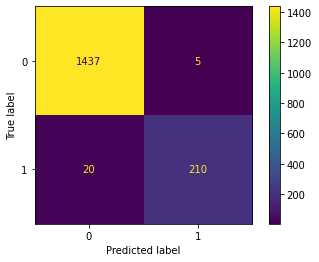

In [29]:
# Show a confusion matrix of results
from sklearn import metrics
import matplotlib.pyplot as plt
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, predictions)).plot()
plt.show()

In [30]:
# Print a classification report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1442
        spam       0.98      0.91      0.94       230

    accuracy                           0.99      1672
   macro avg       0.98      0.95      0.97      1672
weighted avg       0.98      0.99      0.98      1672



In [31]:
print(metrics.accuracy_score(y_test, predictions))

0.9850478468899522


Let's test the new system with some typical spam and ham text messages.

In [32]:
# Typical ham text message
sample_text_message = ["I'm going to go to work soon"]
transformed_text = tfidf_vectorizer.transform(sample_text_message)

model_output = classifier.predict(transformed_text)
print(model_output)

['ham']


In [33]:
# Typical spam text message
sample_text_message = ["You can win a holiday! Text 23455 to take this offer up."]
transformed_text = tfidf_vectorizer.transform(sample_text_message)

model_output = classifier.predict(transformed_text)
print(model_output)

['spam']


We can write a function to simplify this process:

In [34]:
def predict_message_type(text_message):
    # Note that I'm using square brackets around the text_message variable
    transformed_message = tfidf_vectorizer.transform([text_message])
    
    # Predict model output from 
    model_output = classifier.predict(transformed_message)
    return(model_output)

In [35]:
# Submit a text message to the function and see if the model can accurately detect whether it is ham or spam.
# Here I'm testing whether the model can predict this as SPAM
predict_message_type("You can win a holiday! Text 23455 to take this offer up.")

array(['spam'], dtype=object)

In [36]:
# Typical spam message
predict_message_type("Your invoice is attached to this text. Click this link to download it.")


array(['spam'], dtype=object)

In [37]:
predict_message_type("Hi there. Hows things with you today? Are you heading out for some food?")

array(['ham'], dtype=object)

We can also compare this with a model that uses only the CountVectorizer, and not TF-IDF:

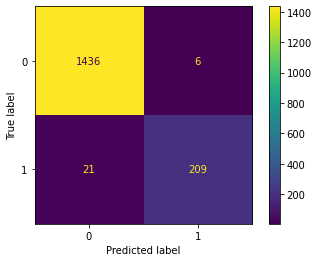

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1442
        spam       0.97      0.91      0.94       230

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.97      1672
weighted avg       0.98      0.98      0.98      1672



In [38]:
# Create an instance of the LinearSVC classifier
classifier_cv = LinearSVC()

# X : {array-like, sparse matrix}
# y : array-like, shape = [n_samples], 
# Target vector relative to X
classifier_cv.fit(X_train_counts, y_train)

X_test_transform = count_vectorizer.transform(X_test)

predictions_cv = classifier_cv.predict(X_test_transform)

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, predictions_cv)).plot()
plt.show()
# Print a classification report
print(metrics.classification_report(y_test, predictions_cv))

In [39]:
print(metrics.accuracy_score(y_test, predictions_cv))

0.9838516746411483


We see that the accuracy of the CountVectorizer model is 98.39%, while using the TF-IDF model improves this to 98.51%. Getting any improvement when the accuracy is already so high is often quite difficult, so this is a good outcome although the improvement appears small. Note that we're measuring these metrics on a test set of 1672 items - adding more data would give us a better picture of the value of this improvement.

## Creating a  Scikit-learn Pipeline

So far we've vectorised the training data, then built a Linear SVC classifier, fitted the model to the training data, and then transformed the testing data before it could be used for predictions from the trained model.

We managed to speed up the process slightly by implementing a function to complete some of the repetitive actions required to test the model.

Fortunately scikit-learn offers a [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class that behaves like a compound classifier. This means we can creat a *pipeline* to contain several libraries that can be called just like a method.

Let's use a pipeline to complete the processes above in a more automated manner.

When `text_classifier.fit(X_train, y_train)` is called, the pipeline takes in `X_train` data and calls `TfidfVectorizer` on it. A model is then stored in memory.

When `predictions = text_classifier.predict(X_test)` is called, `X_text` is first transformed  with `tfidf_vect` and then the `LinearSVC_classifier` is used to predict using `X_test` data.  All steps are performed within the `text_classifier` pipeline.

In [40]:
from sklearn.pipeline import Pipeline

# If we didn't have these libraries loaded then we should also do this
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_classifier = Pipeline([('tfidf_vect', TfidfVectorizer()),
                     ('LinearSVC_classifier', LinearSVC()),
])

# Feed the training data through the pipeline
text_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vect', TfidfVectorizer()),
                ('LinearSVC_classifier', LinearSVC())])

In [41]:
# Form a prediction set
predictions = text_classifier.predict(X_test)

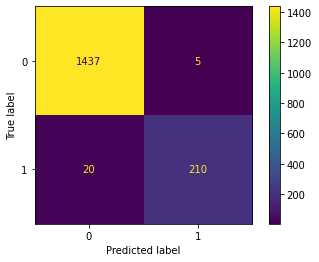

In [42]:
# Report the confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, predictions)).plot()
plt.show()

In [43]:
# Print a classification report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1442
        spam       0.98      0.91      0.94       230

    accuracy                           0.99      1672
   macro avg       0.98      0.95      0.97      1672
weighted avg       0.98      0.99      0.98      1672



In [44]:
print(metrics.accuracy_score(y_test, predictions))

0.9850478468899522


This means that we can predict whether a text message is *spam* or *ham* correctly in 98.5% of time. This shows a large improvement over the previous data we used for predictions.

We can test the model out by feeding in some examples of a ham and spam messages. Remember *ham* is a genuine text message whereas *spam* is not.

In [45]:
# Typical ham text message
text_classifier.predict(["I'm going to go to work soon"])

array(['ham'], dtype=object)

In [46]:
text_classifier.predict(["This is my phone number. I hope you can call before 4pm."])

array(['ham'], dtype=object)

In [47]:
text_classifier.predict(["You can win a holiday! Text 23455 to take this offer up."])

array(['spam'], dtype=object)

In [48]:
text_classifier.predict(["Your invoice is attached to this text. Click this link to download it."])

array(['spam'], dtype=object)

## Exercise

Try building a similar model to classify the IMDB reviews we've seen in previous labs as positive or negative.
* First create a pipeline using `CountVectorizer`, train the model on the resulting vectorised data, calculate the accuracy and obtain the confusion matrix 
*   Then create a second pipeline using `TfidfVectorizer` and determine if this improves your results by comparing the accuracy and confusion matrices.
*   Finally: when we visualised the lemmatised data, we restricted our analysis to 1000 reviews since it ran quite slowly. Since we don't need to do that here, try increasing the size of the dataset. What effect does this have on the train/test accuracy?

The code to create the DataFrame containing decoded reviews and labels is supplied below for convenience. Use different variable names to those above to avoid any confusion, or open a new notebook and write your code there instead.


In [49]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, 
                             test_labels) = imdb.load_data(num_words=30000)

17464789/17464789 [==============================] - 0s 0us/step
